In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
import numpy as np

In [65]:
X, y = make_moons(n_samples = 1000, noise = 0.3)

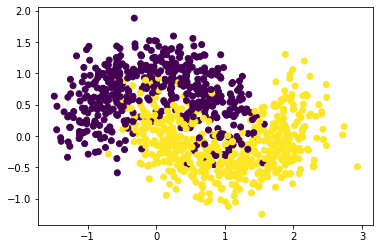

In [66]:
plt.scatter(X[:, 0], X[:, 1], c = y)

In [67]:
from sklearn.model_selection import train_test_split


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [69]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn2 = KNeighborsClassifier(n_neighbors=100)
knn2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [70]:
space = np.linspace(-2,2,100)
x_grid, y_grid = np.meshgrid(space,space)

In [71]:
x_grid
y_grid

array([[-2.        , -2.        , -2.        , ..., -2.        ,
        -2.        , -2.        ],
       [-1.95959596, -1.95959596, -1.95959596, ..., -1.95959596,
        -1.95959596, -1.95959596],
       [-1.91919192, -1.91919192, -1.91919192, ..., -1.91919192,
        -1.91919192, -1.91919192],
       ...,
       [ 1.91919192,  1.91919192,  1.91919192, ...,  1.91919192,
         1.91919192,  1.91919192],
       [ 1.95959596,  1.95959596,  1.95959596, ...,  1.95959596,
         1.95959596,  1.95959596],
       [ 2.        ,  2.        ,  2.        , ...,  2.        ,
         2.        ,  2.        ]])

In [72]:
xy_space = np.stack([x_grid, y_grid], axis = -1).reshape(100 ** 2, 2)

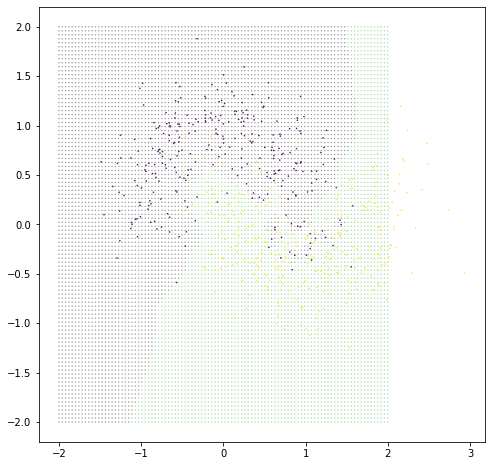

In [73]:
plt.figure(figsize=(8,8))
plt.scatter(xy_space[:,0], xy_space[:,1], s = 0.1, c = knn.predict(xy_space), cmap = plt.cm.Accent_r)
plt.scatter(X_train[:, 0], X_train[:,1], c = y_train, s = 0.3)

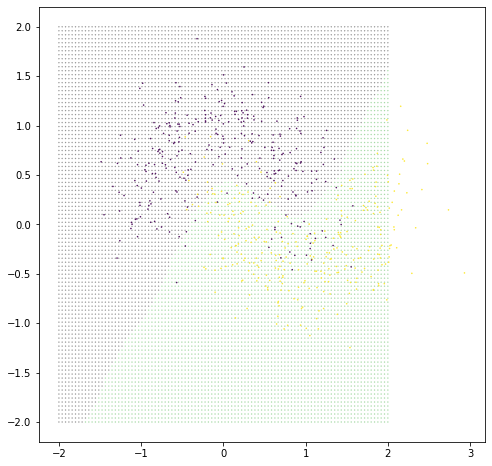

In [74]:
plt.figure(figsize=(8,8))
plt.scatter(xy_space[:,0], xy_space[:,1], s = 0.1, c = knn2.predict(xy_space), cmap = plt.cm.Accent_r)
plt.scatter(X_train[:, 0], X_train[:,1], c = y_train, s = 0.3)

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
train_accuracy = []
test_accuracy = []
for i in range(1, 300):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_accuracy.append(accuracy_score(y_train, knn.predict(X_train)))
    test_accuracy.append(accuracy_score(y_test, knn.predict(X_test)))

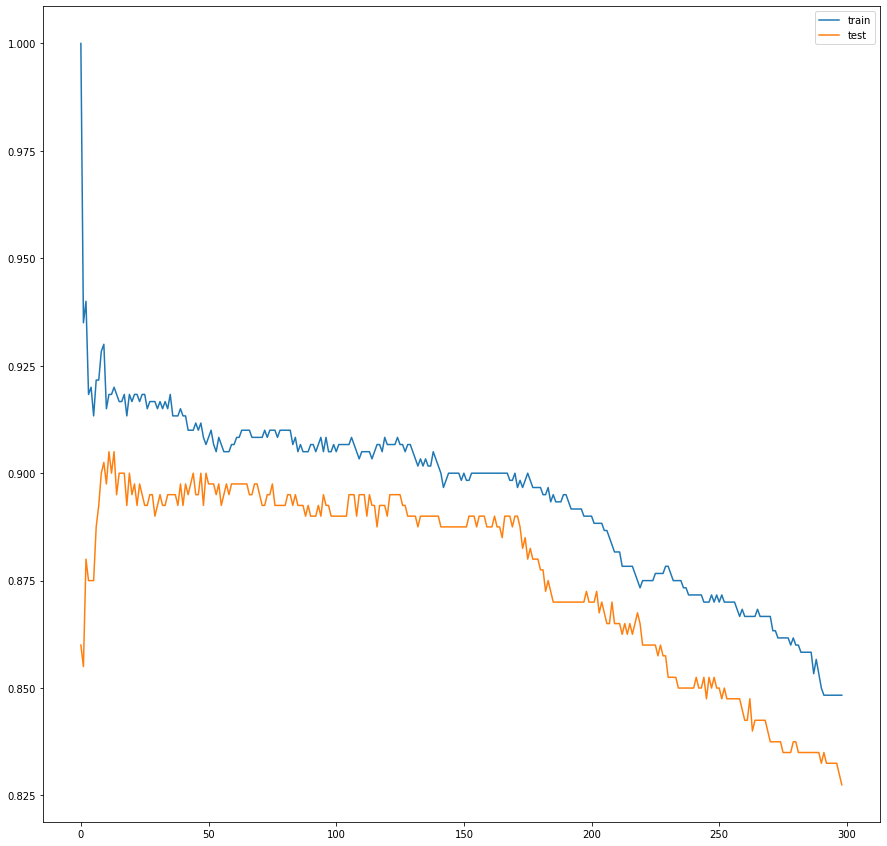

In [77]:
plt.figure(figsize=(15,15))
plt.plot(train_accuracy, label = 'train')
plt.plot(test_accuracy, label = 'test')
plt.legend()


In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
gcv = GridSearchCV(
    knn, param_grid ={'n_neighbors': np.arange(1,50),
                     'p':[1,2]
                     },
    scoring='accuracy'
)

In [80]:
gcv.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=299, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [81]:
gcv.best_params_

{'n_neighbors': 39, 'p': 1}

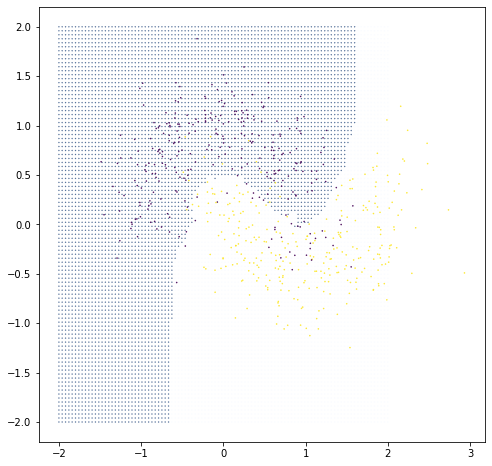

In [82]:
plt.figure(figsize=(8,8))
plt.scatter(xy_space[:,0], xy_space[:,1], s = 0.1, c = gcv.predict(xy_space), cmap = plt.cm.Blues_r)
plt.scatter(X_train[:, 0], X_train[:,1], c = y_train, s = 0.3)

In [83]:
from sklearn.neighbors import KDTree

In [85]:
kdt = KDTree(X_train)

In [87]:
dists, indx = kdt.query(X_test[:1], k = 5)

In [88]:
indx

array([[599, 144, 354, 187, 402]], dtype=int64)

In [89]:
dists

array([[0.08704274, 0.09292945, 0.10593391, 0.10867116, 0.11270518]])

In [90]:
X_train[indx]

array([[[0.60998195, 0.66691884],
        [0.44433916, 0.67020792],
        [0.61526577, 0.69577961],
        [0.529984  , 0.52470995],
        [0.43997235, 0.56512672]]])

In [91]:
y_train[indx]

array([[0, 0, 0, 0, 0]], dtype=int64)